https://medium.com/@shouke.wei/how-to-read-dataset-from-github-and-save-it-with-python-pandas-f8b5bba2b0f2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('china_gdp.csv', header=0,
                 names=['prov','gdpr','year','gdp','pop','finv','trade','fexpen','uinc'],
                 )

# display columns


df.columns
df.head()

,prov,gdpr,year,gdp,pop,finv,trade,fexpen,uinc
0,Guangdong,First,2000,1.074125,8.650,0.314513,1.408147,0.108032,0.976157
1,Guangdong,First,2001,1.203925,8.733,0.348443,14.609701,0.132133,1.041519
2,Guangdong,First,2002,1.350242,8.842,0.385078,1.830169,0.152108,1.113720
3,Guangdong,First,2003,1.584464,8.963,0.481320,2.346735,0.169563,1.238043
4,Guangdong,First,2004,1.886462,NaN,0.587002,2.955899,0.185295,1.362765


In [20]:
df[['gdp','pop','finv','trade','fexpen','uinc']]=(df[['gdp','pop','finv','trade','fexpen','uinc']]
 .apply(pd.to_numeric)
)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prov    95 non-null     object 
 1   gdpr    95 non-null     object 
 2   year    95 non-null     int64  
 3   gdp     95 non-null     float64
 4   pop     93 non-null     float64
 5   finv    95 non-null     float64
 6   trade   95 non-null     float64
 7   fexpen  95 non-null     float64
 8   uinc    95 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.8+ KB


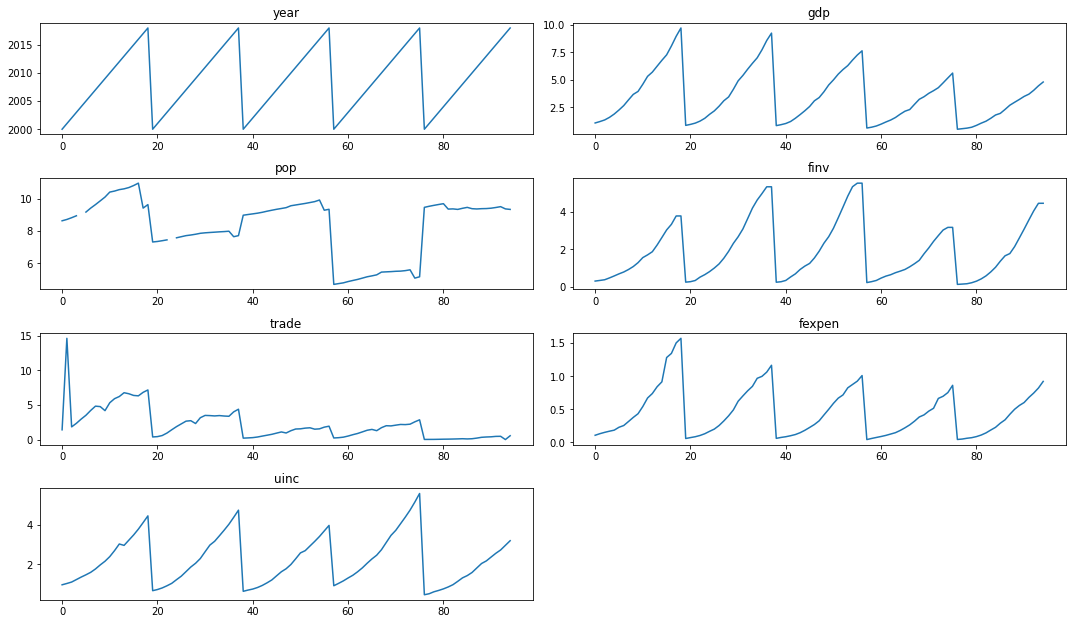

In [22]:
cols = ['year', 'gdp', 'pop', 'finv', 'trade', 'fexpen','uinc']
plt.figure(figsize=(15,15))

for i, each in enumerate(cols):
    plt.subplot(len(cols),2,i+1)
    plt.plot(df[each])
    plt.title(each)
    plt.tight_layout()
plt.show()

In [23]:
df.isna().any()

prov      False
gdpr      False
year      False
gdp       False
pop        True
finv      False
trade     False
fexpen    False
uinc      False
dtype: bool

<AxesSubplot:>

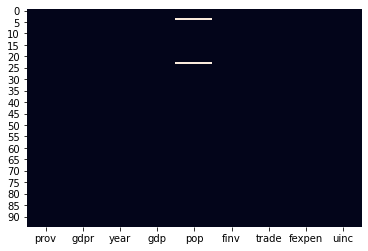

In [24]:
sns.heatmap(df.isna(),cbar=False) 

In [25]:
missings = df.isna().sum().sum()

print(f'The number of missing values: {missings}')

The number of missing values: 2


In [26]:
df.isna().sum()/(len(df))*100

prov      0.000000
gdpr      0.000000
year      0.000000
gdp       0.000000
pop       2.105263
finv      0.000000
trade     0.000000
fexpen    0.000000
uinc      0.000000
dtype: float64

In [27]:
mis_freq = df.isna().sum()/len(df)*100

print("Column with the lowest amount of missings contains {} % missings.".format(mis_freq.min()))
print("Column with the highest amount of missings contains {} % missings.".format(mis_freq.max()))

Column with the lowest amount of missings contains 0.0 % missings.
Column with the highest amount of missings contains 2.1052631578947367 % missings.


In [28]:
m_col = df.loc[:, df.isnull().any()].columns

print(f'The columns with missings is/are {m_col[0]}.')

The columns with missings is/are pop.


In [31]:
df[df['pop'].isna()].index

Int64Index([4, 23], dtype='int64')

In [32]:
df[df['pop'].isna()]

,prov,gdpr,year,gdp,pop,finv,trade,fexpen,uinc
4,Guangdong,First,2004,1.886462,NaN,0.587002,2.955899,0.185295,1.362765
23,Jiangsu,Second,2004,1.500360,NaN,0.655705,1.414083,0.131204,1.048193


In [34]:
df1 = pd.DataFrame({"Mark":[1,2,None,3,4],
                    "Craig":[4,None,5,6,7]})
print(df1)

   Mark  Craig
0   1.0    4.0
1   2.0    NaN
2   NaN    5.0
3   3.0    6.0
4   4.0    7.0


In [37]:
df1.isnull().any(axis=0)

Mark     True
Craig    True
dtype: bool